<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/%E9%9D%9E%E7%B7%9A%E5%BD%A2%E3%81%AA%E9%96%A2%E4%BF%82%E3%82%82%E6%89%B1%E3%81%88%E3%82%8B%E7%9B%B8%E9%96%A2%E4%BF%82%E6%95%B0MIC%E3%81%A8%E3%83%92%E3%83%AB%E3%83%99%E3%83%AB%E3%83%88%E3%83%BB%E3%82%B7%E3%83%A5%E3%83%9F%E3%83%83%E3%83%88%E7%8B%AC%E7%AB%8B%E6%80%A7%E6%A4%9C%E5%AE%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

変数の独立性を測る指標として有名なものにピアソンの相関係数(Pearson's correlation coefficient)があります。ですがそれはあくまで線形な（直線的な）関係を扱う指標で、たとえば二次関数のようなU字型の関係があるときには「相関がない」と判定してしまいます。このような非線形な関係を取り扱う指標として、MICとHSICが知られているので、そのPythonパッケージを使ってみました。

以下のコードは全て Google Colaboratory で動作確認済みです。

# MIC (Maximal Information Coefficient) を計算するPythonパッケージ

次のようにして pip install できます。

In [1]:
!pip install minepy

インストールできたら、次のようにして準備しておきます。

In [2]:
from minepy import MINE
mine = MINE()

# HSIC (Hilbert-Schmidt Independence Criterion) を計算するPythonパッケージ

次のように git clone します。

In [3]:
!git clone https://github.com/amber0309/HSIC.git

fatal: destination path 'HSIC' already exists and is not an empty directory.


次のようにして準備しておきます。

In [4]:
from HSIC.HSIC import hsic_gam

# 一次関数

まずは一次関数について調べてみます。

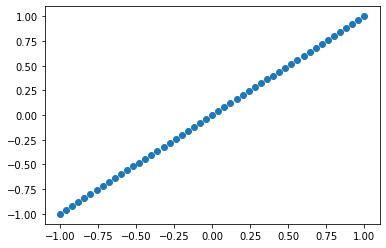

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 51)
Y = X
plt.scatter(X, Y)

ピアソンの相関係数は

In [7]:
np.corrcoef(X, Y)[0, 1]

1.0

MICは

In [8]:
mine.compute_score(X, Y)
mine.mic()

0.9999999999999998

HSSCは、次の値が大きいほど独立性が低く、小さいほど独立性が高いそうです。

In [9]:
testStat, thresh = hsic_gam(X.reshape(len(X), 1), Y.reshape(len(Y), 1))
testStat / thresh

22.610487654066624

一次関数にノイズを加えてみましょう。

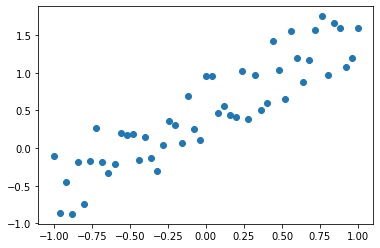

In [10]:
import numpy as np

X = np.linspace(-1, 1, 51)
Y = X + np.random.rand(51,)
plt.scatter(X, Y)

ピアソンの相関係数は

In [11]:
np.corrcoef(X, Y)[0, 1]

0.9018483832673769

MICは

In [12]:
mine.compute_score(X, Y)
mine.mic()

0.9997226475394071

HSICは

In [13]:
testStat, thresh = hsic_gam(X.reshape(len(X), 1), Y.reshape(len(Y), 1))
testStat / thresh

13.706487127525389

ノイズの大きさを少しずつ増やしていったときに、ピアソンの相関係数がどう変化するか計算してみましょう。

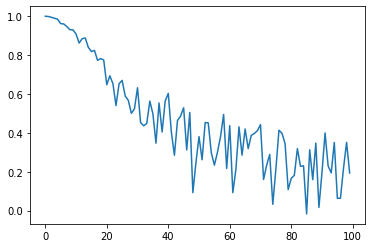

In [14]:
D = []
C = []
for d in range(100):
    X = np.linspace(-1, 1, 51)
    Y = X + np.random.rand(51,) * d / 10
    D.append(d)
    C.append(np.corrcoef(X, Y)[0, 1])

plt.plot(D, C)

同様に、ノイズの大きさを少しずつ増やしていったときに、MICがどう変化するか計算してみましょう。

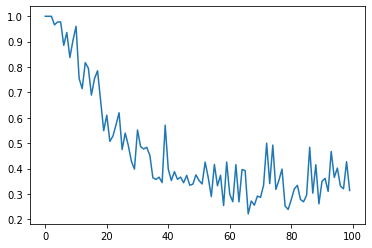

In [15]:
D = []
C = []
for d in range(100):
    X = np.linspace(-1, 1, 51)
    Y = X + np.random.rand(51,) * d / 10
    D.append(d)
    mine.compute_score(X, Y)
    C.append(mine.mic())

plt.plot(D, C)

同様に、ノイズの大きさを少しずつ増やしていったときに、HSICがどう変化するか計算してみましょう。

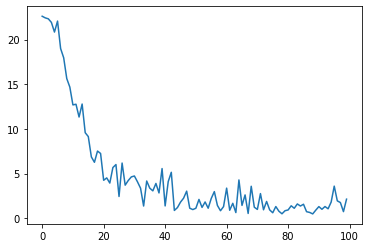

In [16]:
D = []
C = []
for d in range(100):
    X = np.linspace(-1, 1, 51)
    Y = X + np.random.rand(51,) * d / 10
    D.append(d)
    testStat, thresh = hsic_gam(X.reshape(len(X), 1), Y.reshape(len(Y), 1))
    C.append(testStat / thresh)

plt.plot(D, C)

# 二次関数

次は二次関数です。

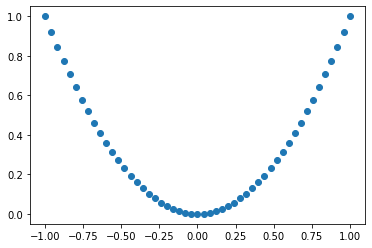

In [17]:
import numpy as np

X = np.linspace(-1, 1, 51)
Y = X**2
plt.scatter(X, Y)

ピアソンの相関係数は

In [18]:
np.corrcoef(X, Y)[0, 1]

-2.3862043230836297e-17

MICは

In [19]:
mine.compute_score(X, Y)
mine.mic()

0.9997226475394071

HSICは

In [20]:
testStat, thresh = hsic_gam(X.reshape(len(X), 1), Y.reshape(len(Y), 1))
testStat / thresh

9.285886928766184

ノイズを加えてみましょう。

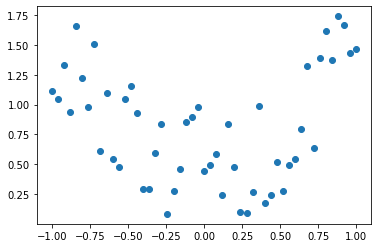

In [21]:
X = np.linspace(-1, 1, 51)
Y = X**2 + np.random.rand(51,)
plt.scatter(X, Y)

ピアソンの相関係数は

In [22]:
np.corrcoef(X, Y)[0, 1]

0.04693076570744622

MICは

In [23]:
mine.compute_score(X, Y)
mine.mic()

0.5071787519579662

HSICは

In [24]:
testStat, thresh = hsic_gam(X.reshape(len(X), 1), Y.reshape(len(Y), 1))
testStat / thresh

5.247036645612692

ノイズの大きさを少しずつ増やしていったときに、ピアソンの相関係数がどう変化するか計算してみましょう。

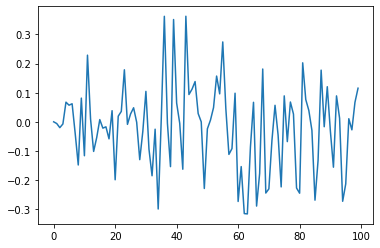

In [25]:
D = []
C = []
for d in range(100):
    X = np.linspace(-1, 1, 51)
    Y = X**2 + np.random.rand(51,) * d / 10
    D.append(d)
    C.append(np.corrcoef(X, Y)[0, 1])

plt.plot(D, C)

同様に、ノイズの大きさを少しずつ増やしていったときに、MICがどう変化するか計算してみましょう。

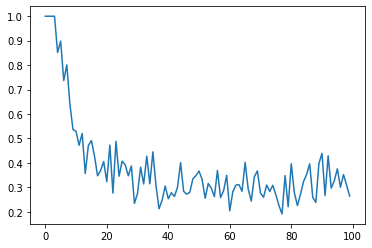

In [26]:
D = []
C = []
for d in range(100):
    X = np.linspace(-1, 1, 51)
    Y = X**2 + np.random.rand(51,) * d / 10
    D.append(d)
    mine.compute_score(X, Y)
    C.append(mine.mic())

plt.plot(D, C)

同様に、ノイズの大きさを少しずつ増やしていったときに、HSICがどう変化するか計算してみましょう。

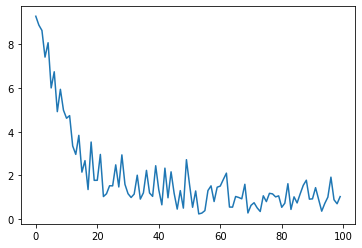

In [27]:
D = []
C = []
for d in range(100):
    X = np.linspace(-1, 1, 51)
    Y = X**2 + np.random.rand(51,) * d / 10
    D.append(d)
    testStat, thresh = hsic_gam(X.reshape(len(X), 1), Y.reshape(len(Y), 1))
    C.append(testStat / thresh)

plt.plot(D, C)

ピアソンの相関係数が二次関数の関係性を検出できていないのに対して、MICもHSICも検出できていることがわかります。また、MICは小さなノイズにはほとんど影響を受けていないだろうことも分かります。

# 三角関数

三角関数も見てみましょう。

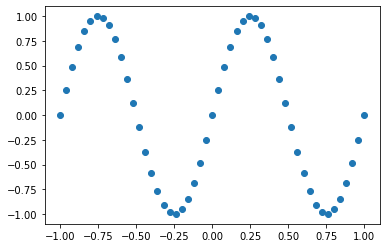

In [39]:
import numpy as np

X = np.linspace(-1, 1, 51)
Y = np.sin((X)*np.pi*2)
plt.scatter(X, Y)

ピアソンの相関係数は

In [40]:
np.corrcoef(X, Y)[0, 1]

-0.37651692742033543

MICは

In [41]:
mine.compute_score(X, Y)
mine.mic()

0.9997226475394071

HSICは

In [42]:
testStat, thresh = hsic_gam(X.reshape(len(X), 1), Y.reshape(len(Y), 1))
testStat / thresh

3.212604441715373

ノイズを加えてみましょう。

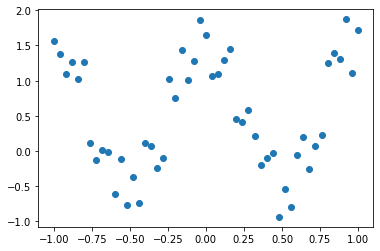

In [43]:
import numpy as np

X = np.linspace(-1, 1, 51)
Y = np.sin((X+0.25)*np.pi*2) + np.random.rand(51,)
plt.scatter(X, Y)

ピアソンの相関係数は

In [44]:
np.corrcoef(X, Y)[0, 1]

0.049378342546505014

MICは

In [45]:
mine.compute_score(X, Y)
mine.mic()

0.9997226475394071

HSICは

In [46]:
testStat, thresh = hsic_gam(X.reshape(len(X), 1), Y.reshape(len(Y), 1))
testStat / thresh

1.3135420547013614

ノイズをだんだん大きくしていったときの影響を調べます。ピアソンの相関係数は

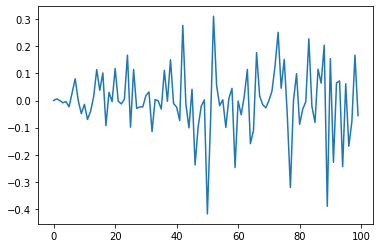

In [47]:
D = []
C = []
for d in range(100):
    X = np.linspace(-1, 1, 51)
    Y = np.sin((X+0.25)*np.pi*2) + np.random.rand(51,) * d / 10
    D.append(d)
    C.append(np.corrcoef(X, Y)[0, 1])

plt.plot(D, C)

MICは

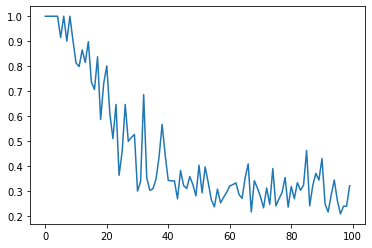

In [48]:
D = []
C = []
for d in range(100):
    X = np.linspace(-1, 1, 51)
    Y = np.sin((X+0.25)*np.pi*2) + np.random.rand(51,) * d / 10
    D.append(d)
    mine.compute_score(X, Y)
    C.append(mine.mic())

plt.plot(D, C)

HSICは

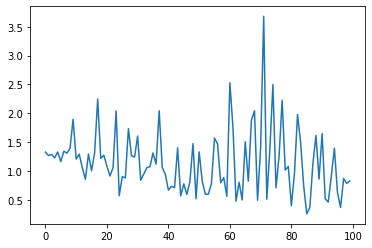

In [49]:
D = []
C = []
for d in range(100):
    X = np.linspace(-1, 1, 51)
    Y = np.sin((X+0.25)*np.pi*2) + np.random.rand(51,) * d / 10
    D.append(d)
    testStat, thresh = hsic_gam(X.reshape(len(X), 1), Y.reshape(len(Y), 1))
    C.append(testStat / thresh)

plt.plot(D, C)

ピアソンの相関係数が、ノイズ付きの三角関数の関係性を検出できなかったのは想定内でしたが、HSICも脱落してしまった感じですね。その中でもMICが関係性を検出できていたのは驚きでした。

# シグモイド関数

最後に、シグモイド関数です。

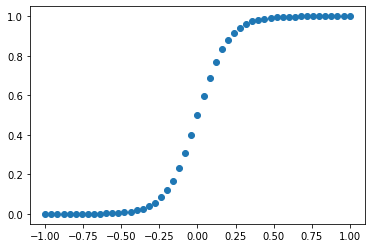

In [58]:
import numpy as np

X = np.linspace(-1, 1, 51)
Y = 1 / (1 + np.exp(-X*10))
plt.scatter(X, Y)

ピアソンの相関係数は

In [59]:
np.corrcoef(X, Y)[0, 1]

0.9354020629807919

MICは

In [60]:
mine.compute_score(X, Y)
mine.mic()

0.9999999999999998

HSICは

In [61]:
testStat, thresh = hsic_gam(X.reshape(len(X), 1), Y.reshape(len(Y), 1))
testStat / thresh

27.433932271008874

ノイズを加えてみましょう。

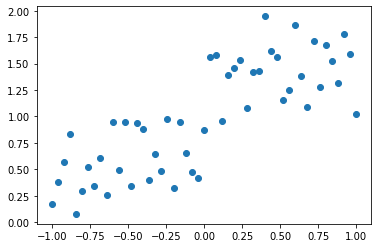

In [62]:
import numpy as np

X = np.linspace(-1, 1, 51)
Y = 1 / (1 + np.exp(-X*10)) + np.random.rand(51,)
plt.scatter(X, Y)

ピアソンの相関係数は

In [63]:
np.corrcoef(X, Y)[0, 1]

0.7994507640548881

MICは

In [64]:
mine.compute_score(X, Y)
mine.mic()

0.9997226475394071

HSICは

In [65]:
testStat, thresh = hsic_gam(X.reshape(len(X), 1), Y.reshape(len(Y), 1))
testStat / thresh

12.218008194240534

ノイズを増やしていった影響を見てみましょう。ピアソンの相関係数は

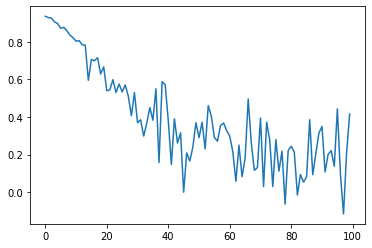

In [66]:
D = []
C = []
for d in range(100):
    X = np.linspace(-1, 1, 51)
    Y = 1 / (1 + np.exp(-X*10)) + np.random.rand(51,) * d / 10
    D.append(d)
    C.append(np.corrcoef(X, Y)[0, 1])

plt.plot(D, C)

MICは

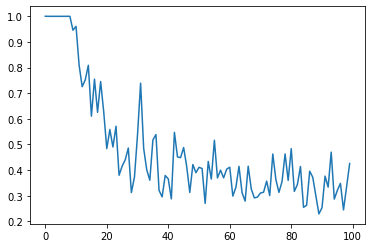

In [67]:
D = []
C = []
for d in range(100):
    X = np.linspace(-1, 1, 51)
    Y = 1 / (1 + np.exp(-X*10)) + np.random.rand(51,) * d / 10
    D.append(d)
    mine.compute_score(X, Y)
    C.append(mine.mic())

plt.plot(D, C)

HSICは

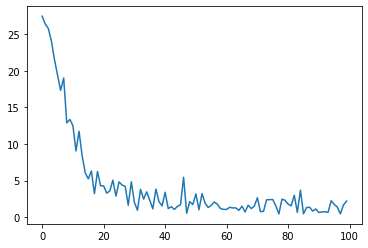

In [68]:
D = []
C = []
for d in range(100):
    X = np.linspace(-1, 1, 51)
    Y = 1 / (1 + np.exp(-X*10)) + np.random.rand(51,) * d / 10
    D.append(d)
    testStat, thresh = hsic_gam(X.reshape(len(X), 1), Y.reshape(len(Y), 1))
    C.append(testStat / thresh)

plt.plot(D, C)

いずれの指標も、関係性を検出できていますが、ノイズに対する強さで言えばMICが最強という感じです。